<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">
 
# Decision Trees & Ensembles
 
_Author: Jonathan Bechtel (DC)_

*Adapted from Chapter 8 of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/)*

---

### Why Decision Trees?

- They can be applied to both regression and classification problems.
- They are easy to explain to others (interpretable).
- They are very popular among data scientists.
- They are the basis for more sophisticated models.
- They have a different way of "thinking" than the other models we have studied.

In [99]:
import pandas as pd
import numpy as np
df = pd.read_csv('../data/hitters.csv')
%matplotlib inline

In [4]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


<a id="part-one"></a>
# How Much Can A Baseball Player Expect to Earn?

![Salary tree](assets/salary_tree.png)

![Salary tree annotated](assets/salary_tree_annotated.png)

### The Above Decision Tree Is Simple, But........

 - You can create a node for any unique value in your dataset
 - Work equally well for categorical or numeric data
 - Decision trees made from most datasets that we actually work on are very elaborate
 - As a default, they drill down until your leaf size is 1!

### Question Prompt:

How Does A Decision Tree Decide Where to Make A Split? 

### Answer:  

A metric called **information gain**. 

The formula for this varies, but you can intuitively think of this as the difference weighted average of the targer variable between two values.

### More Questions:  

 - Are decision trees parametric or non-parametric?
 - Are they sensitive to the scale of your data? 
 - How do decision trees handle outliers in your data?
 - Does data need to be standardized for a decision tree?

### Even More Questions:  

 - How could a decision tree go wrong?
 - What are some of its possible sensitivities?
 - How might we get around this?

<a id="sklearn-tree"></a>
## Building a Regression Tree in `scikit-learn`

In [56]:
# Instantiate a DecisionTreeRegressor (with random_state=1).
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=1, max_depth=4)

### Question:

What might be some ways you'd want to finetune a decision tree?

In [35]:
tree.get_params()

{'criterion': 'mse',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 1,
 'splitter': 'best'}

### Fitting and Drawing A Tree

In [51]:
# fill in missing values
df['Salary'].fillna(df.Salary.mean(), inplace=True)
# create x and y columns
X = df.loc[:, df.columns != 'Salary']
y = df['Salary']
# create dummy variables
X = pd.get_dummies(X)

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2019)

In [57]:
tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

### Creating a Tree Diagram

In [45]:
from sklearn.tree import export_graphviz
import IPython
import graphviz
import re

def draw_tree(t, df, size=10, ratio=0.6, precision=0):
    """ Draws a representation of a random forest in IPython.
    Parameters:
    -----------
    t: The tree you wish to draw
    df: The data used to train the tree. This is used to get the names of the features.
    """
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True,
                      special_characters=True, rotate=True, precision=precision)
    IPython.display.display(graphviz.Source(re.sub('Tree {',
       f'Tree {{ size={size}; ratio={ratio}', s)))

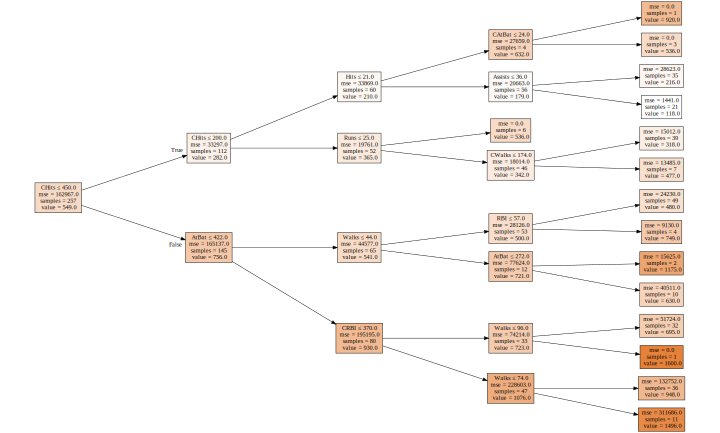

In [58]:
draw_tree(tree, X_train)

### Group Exercise:

For our dataset, find the **ideal number of samples per leaf** for our training set using 10-fold cross validation.  

Test out these possible values: 1, 5, 10, 25, 50.

Write down the number of leaves that returned the best r_squared value, as well as the r_squared value itself.

### Random Forests & Decision Tree Ensembles

### What is Ensembling?

**Ensemble learning (or "ensembling")** is the process of combining several predictive models in order to produce a combined model that is more accurate than any individual model. 

**The big idea:** If you have a collection of individually imperfect (and independent) models, the "one-off" mistakes made by each model are probably not going to be made by the rest of the models, and thus the mistakes will be discarded when you average the models.

There are two basic **methods for ensembling:**

- Manually ensembling your individual models.
- Using a model that ensembles for you.

<a id="part-one"></a>
## Part 1: Manual Ensembling

What makes an effective manual ensemble?

- Different types of **models**.
- Different combinations of **features**.
- Different **tuning parameters**.

![Machine learning flowchart](assets/crowdflower_ensembling.jpg)

*Machine learning flowchart created by the [winner](https://github.com/ChenglongChen/Kaggle_CrowdFlower) of Kaggle's [CrowdFlower competition](https://www.kaggle.com/c/crowdflower-search-relevance)*.

<a id="part-two"></a>
## Part 2: Bagging

The primary weakness of **decision trees** is that they don't tend to have the best predictive accuracy. This is partially because of **high variance**, meaning that different splits in the training data can lead to very different trees.

**Bagging** is a general-purpose procedure for reducing the variance of a machine learning method but is particularly useful for decision trees. Bagging is short for **bootstrap aggregation**, meaning the aggregation of bootstrap samples.

A **bootstrap sample** is a random sample with replacement. So, it has the same size as the original sample but might duplicate some of the original observations.

**How does bagging work (for decision trees)?**

1. Grow N trees using X bootstrap samples from the training data.
2. Train each tree on its bootstrap sample and make predictions.
3. Take the average of all the tree values for your final prediction.

Bagging increases predictive accuracy by **reducing the variance**, similar to how cross-validation reduces the variance associated with train/test split (for estimating out-of-sample error) by splitting many times an averaging the results.

### Using RandomForests With Scikit Learn

In [47]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

### How Might We Finetune A Random Forest?

 - number of trees (estimators)
 - number of features to sample at each split (unique to random forests)
 - how to grow each individual tree (similar to a decision tree itself

#### Choosing the Best Number of Features at Each Split

You generally have four different choices:
 - manually define the number of features you want to use
 - manually define the percentage of features you want to use
 - **sqrt**:  the square root of the total number of features
 - **log2**:  the log of the number of features that you want to use
 
These are all specified with the `max_features` parameter in a Random Forest.

Generally, a smaller number of features is a better safeguard against overfitting.

In [48]:
rf.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [50]:
rf.fit(X, y)
rf.estimators_

[DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=413304388, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1289530102, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1058019337, splitter='best'),
 DecisionTreeRegress

### Group Activity:  

Using 10-fold cross-validation, find the best value to use for the 'max_features' parameter on our training set.

Test between these three values:  
 - 1/2 of all features
 - the square root of all features
 - the log of all features
 
Look at the RandomForest documentation if you have any questions:  https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor

Write the value that gave you the best results, as well as the r_squared value on your nameplate.

### Our Very First Kaggle Competition!

We're going to spend the rest of class making our first submission to a Kaggle competition.  

You can use this competition as the basis for homework 3 if you choose.  

The dataset we're going to be working with is the Ames, Iowa housing dataset.  Information about it can be found here:  https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

We're going to create a baseline submission using a Random Forest.

In [93]:
train = pd.read_csv('../data/iowa_housing/train.csv', usecols=[1, 17, 18, 19, 43, 44, 46, 49, 50, 70, 77, 80])
test  = pd.read_csv('../data/iowa_housing/test.csv', usecols=[1, 17, 18, 19, 43, 44, 46, 49, 50, 70, 77])

In [89]:
train.head()

,MSSubClass,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,ScreenPorch,YrSold,SalePrice
0,60,7,5,2003,856,854,1710,2,1,0,2008,208500
1,20,6,8,1976,1262,0,1262,2,0,0,2007,181500
2,60,7,5,2001,920,866,1786,2,1,0,2008,223500
3,70,7,5,1915,961,756,1717,1,0,0,2006,140000
4,60,8,5,2000,1145,1053,2198,2,1,0,2008,250000


In [94]:
test.head()

,MSSubClass,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,ScreenPorch,YrSold
0,20,5,6,1961,896,0,896,1,0,120,2010
1,20,6,6,1958,1329,0,1329,1,1,0,2010
2,60,5,5,1997,928,701,1629,2,1,0,2010
3,60,6,6,1998,926,678,1604,2,1,0,2010
4,120,8,5,1992,1280,0,1280,2,0,144,2010


In [95]:
train.isnull().sum()

MSSubClass     0
OverallQual    0
OverallCond    0
YearBuilt      0
1stFlrSF       0
2ndFlrSF       0
GrLivArea      0
FullBath       0
HalfBath       0
ScreenPorch    0
YrSold         0
SalePrice      0
dtype: int64

In [96]:
test.isnull().sum()

MSSubClass     0
OverallQual    0
OverallCond    0
YearBuilt      0
1stFlrSF       0
2ndFlrSF       0
GrLivArea      0
FullBath       0
HalfBath       0
ScreenPorch    0
YrSold         0
dtype: int64

In [97]:
X_train, y_train = train.loc[:, train.columns != 'SalePrice'], np.log(train['SalePrice'])

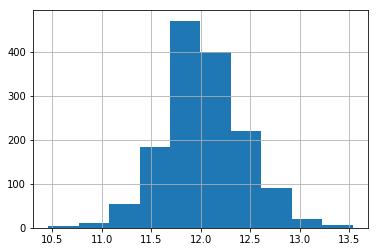

In [101]:
y_train.hist();

In [109]:
def rmse(estimator, X, y):
    preds  = estimator.predict(X)
    error = np.sqrt(np.mean((preds - y)**2))
    return error

In [110]:
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor()

samples_per_leaf = [1, 5, 10, 15, 25, 50]
rf_scores = []


for num_samples in samples_per_leaf:
    rf.set_params(min_samples_leaf=num_samples)
    scores = cross_val_score(estimator=rf, X=X_train, y=y_train, scoring=rmse, cv=10)
    rf_scores.append((np.mean(scores), num_samples))

C:\Users\Jonat\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Jonat\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Jonat\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Jonat\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Jonat\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: Future

C:\Users\Jonat\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Jonat\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Jonat\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Jonat\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Jonat\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: Future

In [111]:
rf_scores

[(0.16126770455635717, 1),
 (0.16352814951246772, 5),
 (0.16738241158857056, 10),
 (0.1725119480282356, 15),
 (0.1808560938458545, 25),
 (0.19672265278385395, 50)]

In [112]:
rf.set_params(min_samples_leaf=1)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [114]:
rf.fit(X_train, y_train)

C:\Users\Jonat\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [115]:
test['Prediction'] = rf.predict(test)

In [122]:
np.exp(test.Prediction)

0       122498.293047
1       148197.426447
2       147142.108850
3       173153.600422
4       201704.188870
5       185589.118111
6       159573.548677
7       176754.963248
8       184204.667526
9       109100.270930
10      197009.647187
11       87649.544984
12       86220.036701
13      153082.657381
14      151926.277047
15      387204.209328
16      253002.990816
17      322023.165699
18      275446.802285
19      480285.884718
20      325410.937482
21      211354.697964
22      174362.400175
23      171578.945860
24      169892.403521
25      213828.247286
26      374679.809211
27      259215.957022
28      194802.694732
29      204800.544409
            ...      
1429     76002.053893
1430    151104.236540
1431     60696.603962
1432    128929.486732
1433     42767.783326
1434    303367.543460
1435    271294.865095
1436    188030.431575
1437    163411.849672
1438    247622.908078
1439    157330.406795
1440    167957.771864
1441    176283.232794
1442    360880.343259
1443    32

In [124]:
output = pd.DataFrame({
    'Id'       : np.arange(1461, 2920),
    'SalePrice': np.exp(test.Prediction)
})

In [125]:
output.head()

,Id,SalePrice
0,1461,122498.293047
1,1462,148197.426447
2,1463,147142.108850
3,1464,173153.600422
4,1465,201704.188870


In [127]:
output.to_csv('../data/iowa_housing/sample_predictions.csv', index=False)

### Random Forest Interpretation

 - They don't give you coefficients, but there are a number of other useful ways to interpret Random Forests
 - **Most imortant:**  feature_importances_

In [129]:
rf.feature_importances_

array([0.016597  , 0.58447791, 0.03077789, 0.0812437 , 0.08116656,
       0.0194591 , 0.16260999, 0.00461332, 0.00358211, 0.00237258,
       0.01309984])

In [130]:
features = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)
features

,Feature,Importance
1,OverallQual,0.584478
6,GrLivArea,0.162610
3,YearBuilt,0.081244
4,1stFlrSF,0.081167
2,OverallCond,0.030778
5,2ndFlrSF,0.019459
0,MSSubClass,0.016597
10,YrSold,0.013100
7,FullBath,0.004613
8,HalfBath,0.003582


### How Is This Attribute Derived?

Takes the following steps:
 - for every column in training set:
  - randomizes values for that column
  - subtracts the difference between the new score and original score
 - calculates proportion of difference in values